In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
from sklearn import linear_model as lm
from scipy.stats import t

# Exercice 1

On s'intéresse au dataset INVESTMENT.

## Q1
On charge directement le dataset à l'aide de la librairie pandas.

In [2]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = r"\s+")

In [3]:
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


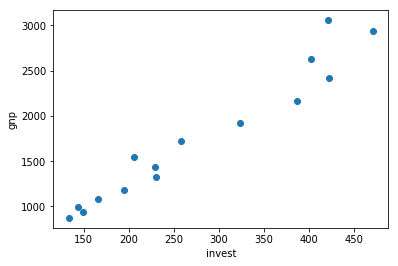

In [4]:
plt.scatter(data[["invest"]], data.gnp)
plt.xlabel("invest")
plt.ylabel("gnp")
plt.show()

## Q2 
On définit deux nouvelles series correspondant à l'échelle logarithmique.


In [5]:
data["log_invest"] = data.invest.apply(m.log)
data["log_gnp"] = data.gnp.apply(m.log)

In [6]:
data.head()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
0,1968,873.4,133.3,82.54,5.16,4.892602,6.772394
1,1969,944.0,149.3,86.79,5.87,5.005958,6.850126
2,1970,992.7,144.2,91.45,5.95,4.971201,6.900429
3,1971,1077.6,166.4,96.01,4.88,5.114395,6.982492
4,1972,1185.9,195.0,100.00,4.50,5.273000,7.078257


In [7]:
data.describe()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667,5.532761,7.383521
std,4.472136,738.145808,117.582691,40.286606,2.812245,0.437486,0.422801
min,1968.000000,873.400000,133.300000,82.540000,4.500000,4.892602,6.772394
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000,5.193697,7.030374
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000,5.437209,7.345494
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000,5.977294,7.735140
max,1982.000000,3057.500000,471.500000,207.230000,13.420000,6.155919,8.025353


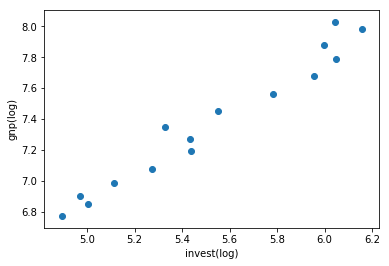

In [8]:
plt.scatter(data[["log_invest"]], data.log_gnp)
plt.xlabel("invest(log)")
plt.ylabel("gnp(log)")
plt.show()

## Q3

Dans un premier temps on s'intéresse à la regresion de Investment sur GNP. Pour cela on se place en échelle logarithmique pour prendre en compte les différences d'échelles.

In [9]:
n = len(data)

In [10]:
y = data.log_invest.values
x = data.log_gnp.values

On a montré dans l'exercice 12 que: 

$$\hat{\beta_0} = \bar{Y_n} - \hat{\beta_1} $$

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x_n})(Y_i-\bar{Y_n})}{ \sum_{i=1}^{n}(x_i - \bar{x_n})²}$$

In [11]:
beta1_chap = sum((x-x.mean())*(y-y.mean()))/sum((x-x.mean())**2)

In [12]:
beta0_chap = y.mean() - beta1_chap*x.mean()

In [13]:
print("L'intercept vaut {:.3f} et la pente est {:.3f}".format(beta0_chap, beta1_chap))

L'intercept vaut -1.964 et la pente est 1.015


On a de plus:
$$\hat{\sigma²} = \frac{1}{n-2}{\sum_{i=1}^{n}(Y_i-\hat{\beta_0}-\hat{\beta_1}x_i)²}$$

In [14]:
sigma_chap_2 = (sum((y-(beta0_chap+beta1_chap*x))**2))/(n-2)

In [15]:
print("L'estimateur de la variance vaut {:.2e}".format(sigma_chap_2))

L'estimateur de la variance vaut 7.68e-03


On peut maintenant calculer:
$$ V[\hat{\beta_0}] = \hat{\sigma²}( \frac{1}{n} + \frac{\bar{x²}} {\sum_{i=1}^{n}{(x_i - \bar{x_n}})²}) $$


$$ V[\hat{\beta_1}] = (\frac{\hat{\sigma²}} {\sum_{i=1}^{n}{(x_i - \bar{x_n}})²}) $$



In [16]:
var_beta0_chap = sigma_chap_2*(1/n+(x.mean()**2)/sum((x-x.mean())**2))

In [17]:
var_beta1_chap = sigma_chap_2/sum((x-x.mean())**2)

In [18]:
print("Les écarts types des estimateurs de l'intercept et \
de la pente sont respectivement {:.2e} et {:.2e}".format(m.sqrt(var_beta0_chap),m.sqrt(var_beta1_chap)))

Les écarts types des estimateurs de l'intercept et de la pente sont respectivement 4.10e-01 et 5.54e-02


In [19]:
y_chap = beta0_chap + beta1_chap*x

In [20]:
R_2  = 1 - np.linalg.norm(y-y_chap)**2/np.linalg.norm(y-y.mean())**2

In [21]:
"Le coefficient de détermination vaut lui {:.3f}".format(R_2)

'Le coefficient de détermination vaut lui 0.963'

# Q4

On teste l'hypothèse $H0: \beta_1=0$

In [22]:
T_stat_pente = beta1_chap/m.sqrt(var_beta1_chap)

In [23]:
print("La t-statistique vaut {:.2f}".format(T_stat_pente))

La t-statistique vaut 18.33


In [24]:
cv95 = t.ppf(1.0 - 0.05/2, n-2) # alpha = 0.05 , et degreef =15-2
print("Le quantile d'une loi de student à 13 degrés de liberté vaut {:.2f} pour un alpha de 0.05.\nOn en déduit que la t-statistique \
n'appartient à l'intervalle de confiance, donc il est fortement probable que la pente soit significative. ".format(cv95))

Le quantile d'une loi de student à 13 degrés de liberté vaut 2.16 pour un alpha de 0.05.
On en déduit que la t-statistique n'appartient à l'intervalle de confiance, donc il est fortement probable que la pente soit significative. 


In [25]:
pval= (1 - t.cdf(abs(T_stat_pente), n-2)) * 2   # t_stat = c'est la formule dans le pol
print("La p-value est {:.2e}".format(pval))

La p-value est 1.14e-10


# Q5

On passe en échelle logarithmique

In [26]:
x_pred = m.log(1000)

In [27]:
y_pred = beta0_chap + beta1_chap * x_pred

In [28]:
"Cela correspond à un investment de {:.2f}".format(m.exp(y_pred))

'Cela correspond à un investment de 155.98'

On calcule la valeur critique de niveau 90%

In [29]:
cv90 = t.ppf(1.0 - 0.1/2, n-2)

On en déduit PI et CI

In [30]:
CI_inf = y_pred - cv90*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [31]:
CI_sup = y_pred + cv90*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [32]:
PI_inf = y_pred - cv90*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [33]:
PI_sup = y_pred + cv90*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [34]:
"L'intervalle de confiance à 90% est IC = [{:.2f},{:.2f}] en echelle logarithmique et IC = [{:.2f},{:.2f}] en repassant à l'exponentielle".format(CI_inf, CI_sup,m.exp(CI_inf), m.exp(CI_sup))

"L'intervalle de confiance à 90% est IC = [4.99,5.11] en echelle logarithmique et IC = [146.68,165.87] en repassant à l'exponentielle"

In [35]:
"L'intervalle de prédiction à 90% est PI = [{:.2f},{:.2f}] en echelle logarithmique et PI = [{:.2f},{:.2f}] en repassant à l'exponentielle".format(PI_inf,PI_sup,m.exp(PI_inf), m.exp(PI_sup))

"L'intervalle de prédiction à 90% est PI = [4.88,5.22] en echelle logarithmique et PI = [132.00,184.31] en repassant à l'exponentielle"

# Q6

On calcule les intervalles pour 50 valeurs regulièrement reparties entre les extremum de log(gnp).

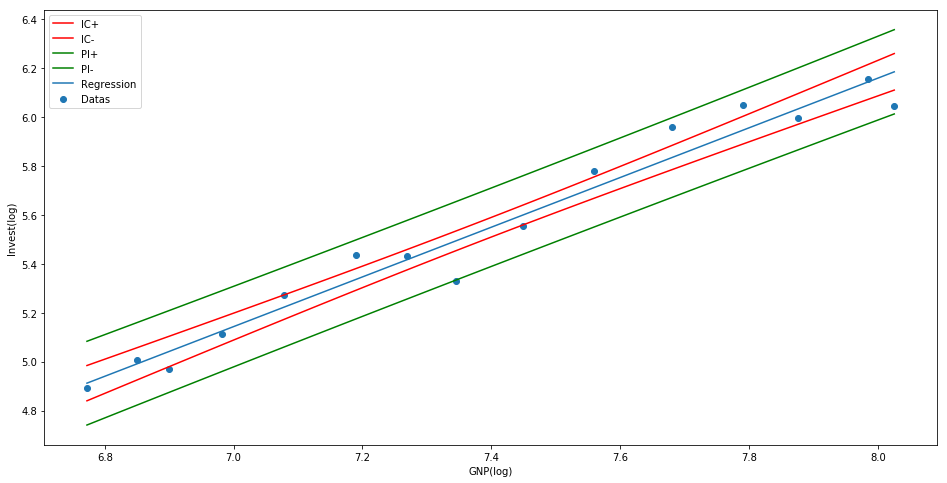

In [36]:
plot1 = plt.figure(1,figsize=(16,8))
plt.scatter(data.log_gnp,data[["log_invest"]], label = "Datas")
x_ = np.linspace(data.log_gnp.min(), data.log_gnp.max())
y_ = [beta0_chap+x*beta1_chap for x in x_]
y_sup = [y+cv90*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf = [y-cv90*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_sup_ = [y+cv90*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf_ = [y-cv90*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
plt.plot(x_,y_sup,c="r",label = "IC+")
plt.plot(x_,y_inf,c="r",label = "IC-")
plt.plot(x_,y_sup_,c="green",label = "PI+")
plt.plot(x_,y_inf_,c="green",label = "PI-")
plt.plot(x_,y_, label = "Regression")
plt.xlabel("GNP(log)")
plt.ylabel("Invest(log)")
plt.legend()
plt.show()

# Q7

In [37]:
lin_model = lm.LinearRegression()

In [38]:
lin_model.fit(data[["log_gnp"]],data["log_invest"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
"On retrouve la valeur de la pente {:.2f}".format(lin_model.coef_[0])

'On retrouve la valeur de la pente 1.02'

In [40]:
"... de l'intercept {:.2f}".format(lin_model.intercept_)

"... de l'intercept -1.96"

In [41]:
"... de la prédiction {:.2f}".format(lin_model.predict([[x_pred]])[0])

'... de la prédiction 5.05'

In [42]:
"... et enfin du coefficient de détermination {:.2f}".format(lin_model.score(data[["log_gnp"]],data["log_invest"]))

'... et enfin du coefficient de détermination 0.96'

# Q8

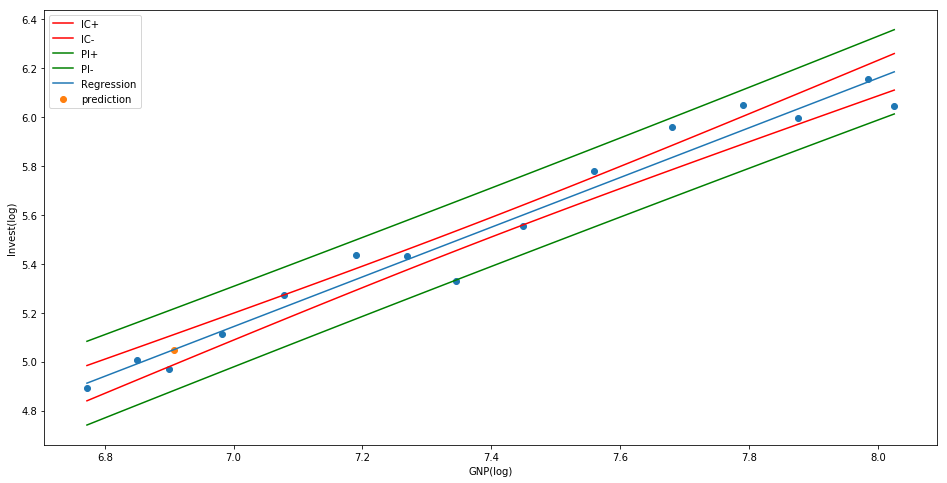

In [43]:
plot = plt.figure(1,figsize=(16,8))
plt.scatter( data.log_gnp,data[["log_invest"]])
plt.scatter(x_pred,y_pred, label = "prediction")
y_sup = [y+cv90*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf = [y-cv90*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_sup_ = [y+cv90*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf_ = [y-cv90*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
plt.plot(x_,y_sup,c="r",label = "IC+")
plt.plot(x_,y_inf,c="r",label = "IC-")
plt.plot(x_,y_sup_,c="green",label = "PI+")
plt.plot(x_,y_inf_,c="green",label = "PI-")
plt.plot(x_,y_, label = "Regression")
plt.xlabel("GNP(log)")
plt.ylabel("Invest(log)")
plt.legend()
plt.show()

# Q9 

On ajoute une variable explicatrice "interest":

In [44]:
X = data[["log_gnp","interest"]].values

In [45]:
X = np.concatenate((np.ones_like(data.interest).reshape(-1,1),X), axis = 1)

In [46]:
gram = X.T @ X

In [47]:
rg = np.linalg.matrix_rank(gram)

In [48]:
rg

3

La matrice de gram est donc de rang plein et inversible.

# Q10

On commence par inverser la matrice de gram.

In [49]:
gram_inv = np.linalg.inv(gram)

On en déduit les coefficients de regression.

In [50]:
theta_chap = gram_inv @ X.T @ y

In [51]:
print("les coefficients sont respectivement {:.2f} , {:.2f} et {:.2e}".format(*theta_chap))

les coefficients sont respectivement -2.18 , 1.05 et -6.53e-03


Puis les écarts types des différents coefficients:

In [52]:
ychap = X @ theta_chap

In [53]:
s2 = 1/(len(data)-rg)*np.linalg.norm(y-ychap)**2

In [54]:
"Une estimation de la variance du bruit est {:.2e}".format(s2)

'Une estimation de la variance du bruit est 8.19e-03'

In [55]:
var_theta_chap  = [s2*gram_inv[i,i] for i in range(3)]

In [56]:
ecart_type = [m.sqrt(v) for v in var_theta_chap]

In [57]:
"les écarts types des différents coefficients sont respectivement {:.2f} , {:.2f} et {:.2f}".format(*ecart_type)

'les écarts types des différents coefficients sont respectivement 0.66 , 0.10 et 0.02'

In [58]:
R2 = 1-(np.linalg.norm(y-ychap)/np.linalg.norm(y-y.mean()))**2

In [59]:
print("Le coefficient de détermination vaut {:.2f}".format(R2))

Le coefficient de détermination vaut 0.96


On test $\theta_i = 0$

In [60]:
T_stat = theta_chap/ecart_type

In [61]:
print("les statistiques des test de student de la significativité des coefficients sont respectivement:\n\
{:.2f} , {:.2f} et {:.2f}".format(*T_stat))

les statistiques des test de student de la significativité des coefficients sont respectivement:
-3.29 , 10.30 et -0.43


In [62]:
cv95 = t.ppf(1.0 - 0.05/2, n-rg) # alpha = 0.05 , et degreef =15-2

In [63]:
"Or le quantile à 95% d'une loi de student à 12 degrés de liberté est de {:.2f}".format(cv95)

"Or le quantile à 95% d'une loi de student à 12 degrés de liberté est de 2.18"

On en rejette donc $H0 : \theta_0 = 0$ et $H0 : \theta_1 = 0$, en revanche on ne rejette pas $H0 : \theta_2 = 0$

In [64]:
pvals= (1 - t.cdf(abs(T_stat), n-rg)) * 2

In [65]:
print("les p-valeurs valent {:.2e} , {:.2e} et {:.2e}".format(*pvals))

les p-valeurs valent 6.44e-03 , 2.60e-07 et 6.78e-01


On a 67% de chance d'obtenir une valeur de la statistique associée à $\theta_2$ plus élevée. Il n'y a aucune présomption contre l'hypothèse nulle. En revanche les deux premiers coefficients sont significativement non nuls.

# Q11

On définit le nouveau vecteur en repassant GNP en échelle logarithmique.

In [66]:
x_new = np.array([1, m.log(1000),10])

In [67]:
y_new = x_new.T @ theta_chap

In [68]:
"pour GNP = 1000 et interest = 10 la prédiction est log(invest)= {:.2f} soit invest = {:.2f}".format(y_new,m.exp(y_new))

'pour GNP = 1000 et interest = 10 la prédiction est log(invest)= 5.02 soit invest = 150.80'

On définit la valeur critique pour le niveau 99.9%

In [69]:
cv99_9 = t.ppf(1.0 - 0.001/2, 12) # alpha = 0.05 , et degreef =15-2

On calcule alors les intervalles de confiance:

In [70]:
CI = y_new - cv99_9*m.sqrt(x_new.T @ gram_inv @ x_new)*m.sqrt(s2)

In [71]:
CS = y_new + cv99_9*m.sqrt(x_new.T @ gram_inv @ x_new)*m.sqrt(s2)

In [72]:
print("L'intervalle CI est",[float("{:.2f}".format(CI)),float("{:.2f}".format(CS))])

L'intervalle CI est [4.64, 5.39]


In [73]:
PI = y_new - cv99_9*m.sqrt(1+x_new.T @ gram_inv @ x_new)*m.sqrt(s2)

In [74]:
PS = y_new + cv99_9*m.sqrt(1+x_new.T @ gram_inv @ x_new)*m.sqrt(s2)

In [75]:
print("L'intervalle PI est",[float("{:.2f}".format(PI)),float("{:.2f}".format(PS))])

L'intervalle PI est [4.47, 5.56]


# Q12

In [76]:
x1 = np.linspace(data.log_gnp.min(), data.log_gnp.max())
x2 = np.linspace(data.interest.min(), data.interest.max())

On calcule la différence entre les bornes des intervalles et la prédiction pour 50x50 points sur le domaine de définition des données.

In [77]:
ZZ_PI = [[cv99_9*m.sqrt(1+np.array([1,x1_,x2_]).T @ gram_inv @ np.array([1,x1_,x2_]))*m.sqrt(s2)for x1_ in x1] for x2_ in x2]

In [78]:
ZZ_IC = [[cv99_9*m.sqrt(np.array([1,x1_,x2_]).T @ gram_inv @ np.array([1,x1_,x2_]))*m.sqrt(s2)for x1_ in x1] for x2_ in x2]

In [79]:
xx,yy = np.meshgrid(x1,x2)

On calcule les prédictions pour chacun de ces points.

In [80]:
zz = theta_chap[0]+theta_chap[1]*xx+theta_chap[2]*yy

Enfin on trace chacune des surfaces obtenues ainsi que les données.

In [81]:
%matplotlib notebook

<IPython.core.display.Javascript object>


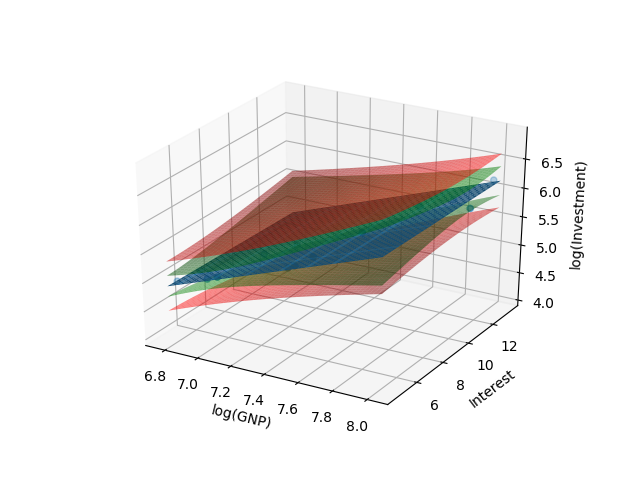

Text(0.5,0,'log(Investment)')

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data.log_gnp, data.interest, data.log_invest)
ax.plot_surface(xx,yy,zz)
ax.plot_surface(xx,yy,np.array(ZZ_PI)+zz, color="r", alpha = 0.5, label = "PI")
ax.plot_surface(xx,yy,-np.array(ZZ_PI)+zz, color="r", alpha = 0.5)
ax.plot_surface(xx,yy,np.array(ZZ_IC)+zz, color="green", alpha = 0.5, label = "CI")
ax.plot_surface(xx,yy,-np.array(ZZ_IC)+zz, color="green", alpha = 0.5)
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Investment)')

# Q13

In [83]:
lin_model_3d = lm.LinearRegression()
lin_model_3d.fit(data[["log_gnp","interest"]],data["log_invest"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
"L'intercept du modèle scikit learn est de {:.2f}".format(lin_model_3d.intercept_)

"L'intercept du modèle scikit learn est de -2.18"

In [85]:
"Les coefficients de regression valent {:.2f} et {:.2e} ".format(*lin_model_3d.coef_)

'Les coefficients de regression valent 1.05 et -6.53e-03 '

In [86]:
"La prédiction est égal à {:.2f}".format(*lin_model_3d.predict([[m.log(1000), 10]]))

'La prédiction est égal à 5.02'

In [87]:
"Le coefficient de détermination est quant à lui égal à {:.2f}".format(lin_model_3d.score(data[["log_gnp","interest"]],data["log_invest"]))

'Le coefficient de détermination est quant à lui égal à 0.96'

On a bien retrouvé les valeurs calculées aux questions précédentes.